In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [10]:
# Import Dataset
WD = pd.read_excel('world_development.xlsx')
WD.head()


,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [11]:
WD.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [12]:
WD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [13]:
WD.duplicated().sum()


0

In [14]:
WD['Country'].duplicated().sum()


2496

In [15]:
WD.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [16]:
WD.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [17]:
(WD.isnull().mean().round(4) * 100)


Birth Rate                 4.40
Business Tax Rate         47.37
CO2 Emissions             21.41
Country                    0.00
Days to Start Business    36.46
Ease of Business          93.16
Energy Usage              33.99
GDP                        7.77
Health Exp % GDP          11.43
Health Exp/Capita         11.43
Hours to do Tax           47.63
Infant Mortality Rate      9.62
Internet Usage             6.40
Lending Interest          30.47
Life Expectancy Female     5.03
Life Expectancy Male       5.03
Mobile Phone Usage         6.18
Number of Records          0.00
Population 0-14            8.14
Population 15-64           8.14
Population 65+             8.14
Population Total           0.00
Population Urban           0.96
Tourism Inbound           13.61
Tourism Outbound          17.42
dtype: float64

In [18]:
import re #regular expression
import string

def clean_text(text):
    text = re.sub('[$]',' ', text)
    text = re.sub('[%]',' ', text)
    text=re.sub('[,]','',text)
    return text



In [19]:
clean= lambda x: clean_text(x)
WD['GDP'] = WD['GDP'].astype(str)
WD['GDP'] = WD['GDP'].apply(clean)
WD['GDP'] = WD['GDP'].astype(float)


In [20]:
WD['Health Exp/Capita'] = WD['Health Exp/Capita'].astype(str)
WD['Tourism Inbound'] = WD['Tourism Inbound'].astype(str)
WD['Tourism Outbound'] = WD['Tourism Outbound'].astype(str)
WD['Business Tax Rate'] = WD['Business Tax Rate'].astype(str)
WD['Number of Records'] = WD['Number of Records'].astype(str)
WD['Population Total'] = WD['Population Total'].astype(str)


In [21]:
WD['Health Exp/Capita'] = WD['Health Exp/Capita'].apply(clean)
WD['Tourism Inbound'] = WD['Tourism Inbound'].apply(clean)
WD['Tourism Outbound'] = WD['Tourism Outbound'].apply(clean)
WD['Business Tax Rate'] = WD['Business Tax Rate'].apply(clean)
WD['Number of Records'] = WD['Number of Records'].apply(clean)
WD['Population Total'] = WD['Population Total'].apply(clean)


In [22]:
WD['Health Exp/Capita'] = WD['Health Exp/Capita'].astype(float)
WD['Tourism Inbound'] = WD['Tourism Inbound'].astype(float)
WD['Tourism Outbound'] = WD['Tourism Outbound'].astype(float)
WD['Business Tax Rate'] = WD['Business Tax Rate'].astype(float)
WD['Number of Records'] = WD['Number of Records'].astype(float)
WD['Population Total'] = WD['Population Total'].astype(float)


In [23]:
WD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [24]:
# Decide on a threshold for considering/removing null values
threshold_to_consider = 0.1  # For example, consider features with less than 10% missing values
threshold_to_remove = 0.3   # For example, remove features with more than 30% missing values


In [25]:
# Consider missing values
WD= WD.dropna(subset=WD.columns[WD.isnull().mean() <= threshold_to_consider])



In [26]:
# Remove missing values
WD= WD.dropna(thresh=int((1 - threshold_to_remove) * WD.shape[1]))



In [27]:
# Check the shape after handling missing values
print("Original Shape:", WD.shape)
print("Shape after Handling Missing Values:", WD.shape)

Original Shape: (2228, 25)
Shape after Handling Missing Values: (2228, 25)


In [28]:
WD.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


In [29]:
WD.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2702
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2228 non-null   float64
 1   Business Tax Rate       1349 non-null   float64
 2   CO2 Emissions           1870 non-null   float64
 3   Country                 2228 non-null   object 
 4   Days to Start Business  1625 non-null   float64
 5   Ease of Business        173 non-null    float64
 6   Energy Usage            1686 non-null   float64
 7   GDP                     2228 non-null   float64
 8   Health Exp % GDP        2215 non-null   float64
 9   Health Exp/Capita       2215 non-null   float64
 10  Hours to do Tax         1342 non-null   float64
 11  Infant Mortality Rate   2228 non-null   float64
 12  Internet Usage          2228 non-null   float64
 13  Lending Interest        1728 non-null   float64
 14  Life Expectancy Female  2228 non-null   

In [30]:
WD.isnull().sum()

Birth Rate                   0
Business Tax Rate          879
CO2 Emissions              358
Country                      0
Days to Start Business     603
Ease of Business          2055
Energy Usage               542
GDP                          0
Health Exp % GDP            13
Health Exp/Capita           13
Hours to do Tax            886
Infant Mortality Rate        0
Internet Usage               0
Lending Interest           500
Life Expectancy Female       0
Life Expectancy Male         0
Mobile Phone Usage           0
Number of Records            0
Population 0-14              0
Population 15-64             0
Population 65+               0
Population Total             0
Population Urban             0
Tourism Inbound            145
Tourism Outbound           204
dtype: int64

In [31]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
WD['Country_encoded'] = le.fit_transform(WD['Country'])

In [32]:
WD['Country_encoded']=WD['Country_encoded'].astype(float)

In [33]:
WD.drop(['Country'],axis=1,inplace=True)

In [34]:
## Shape of data
WD.shape

(2228, 25)

In [35]:
WD.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,3.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,17.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,21.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,25.0


In [36]:
## Rename columns
data = WD.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'NumberofRecords',
       'Population0to14', 'Population15to64', 'Populationmorethan65',
       'PopulationTotal', 'PopulationUrban', 'TourismInbound',
       'TourismOutbound', 'Country_encoded'],
      dtype='object')

In [37]:
data.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0,3.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,17.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,21.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,25.0


In [38]:
data.isnull().sum()

BirthRate                  0
BusinessTaxRate          879
CO2Emissions             358
DaystoStartBusiness      603
EaseofBusiness          2055
EnergyUsage              542
GDP                        0
HealthExpGDP              13
HealthExpCapita           13
HourstodoTax             886
InfantMortalityRate        0
InternetUsage              0
LendingInterest          500
LifeExpectancyFemale       0
LifeExpectancyMale         0
MobilePhoneUsage           0
NumberofRecords            0
Population0to14            0
Population15to64           0
Populationmorethan65       0
PopulationTotal            0
PopulationUrban            0
TourismInbound           145
TourismOutbound          204
Country_encoded            0
dtype: int64

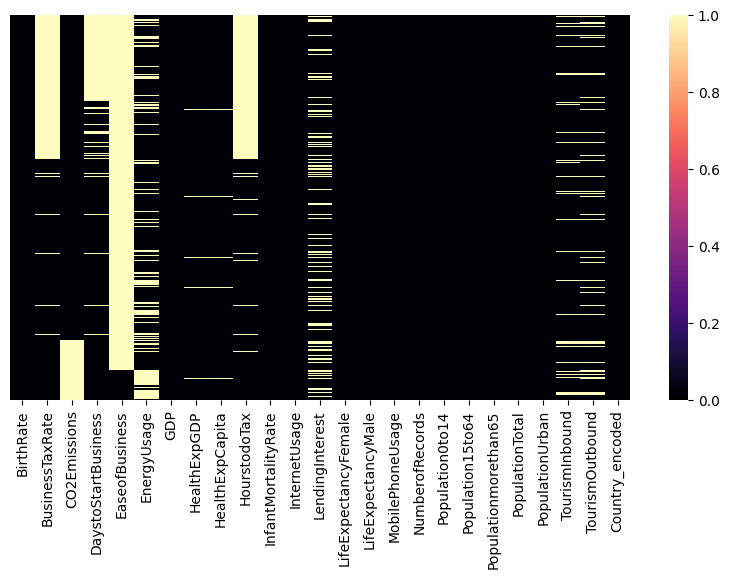

In [39]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

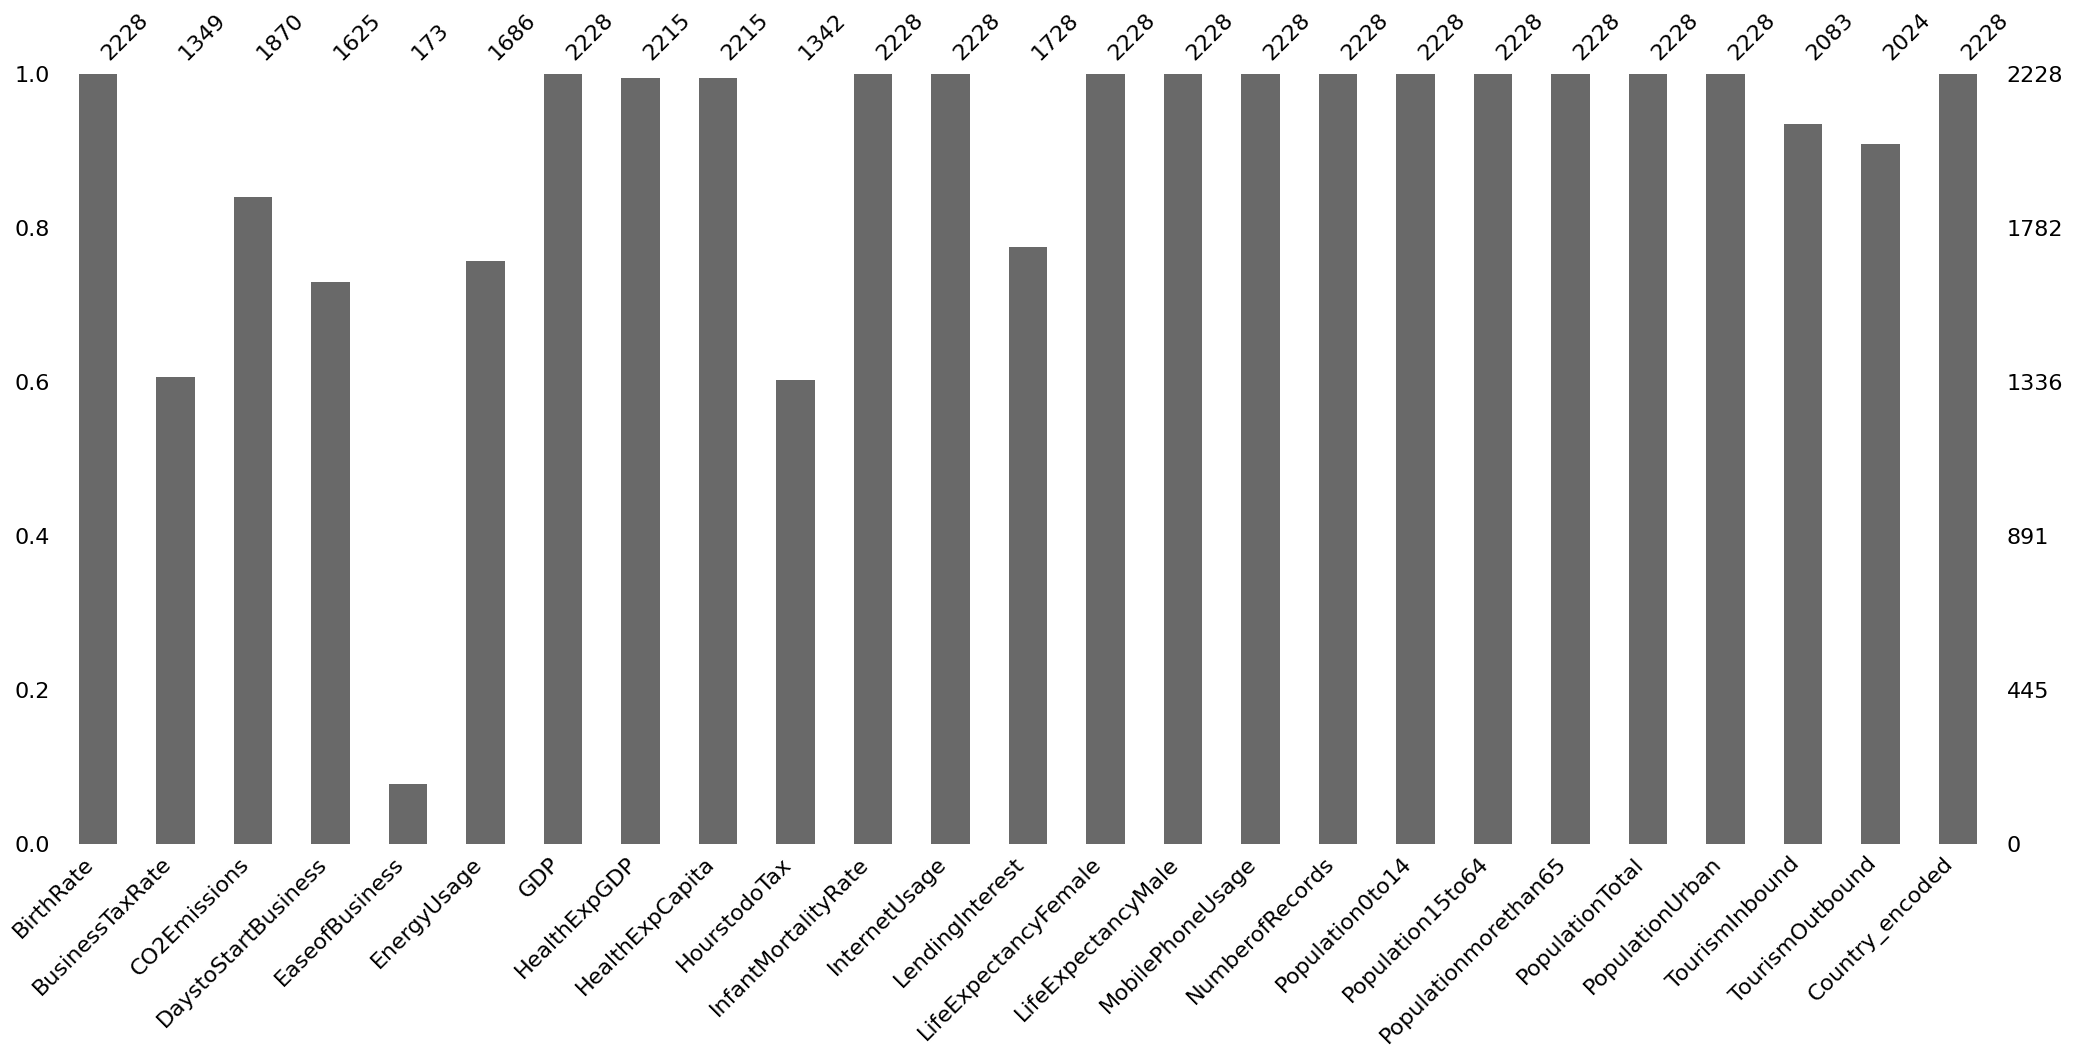

In [40]:
## visualize missing value for each artibute
import missingno as msno
msno.bar(data)
plt.show()

<ipython-input-41-97f54bd0566a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BirthRate,ax=axes[0,0])
<ipython-input-41-97f54bd0566a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
<ipython-input-41-97f54bd0566a>:5: UserWarning: 

`distplot` is a depr

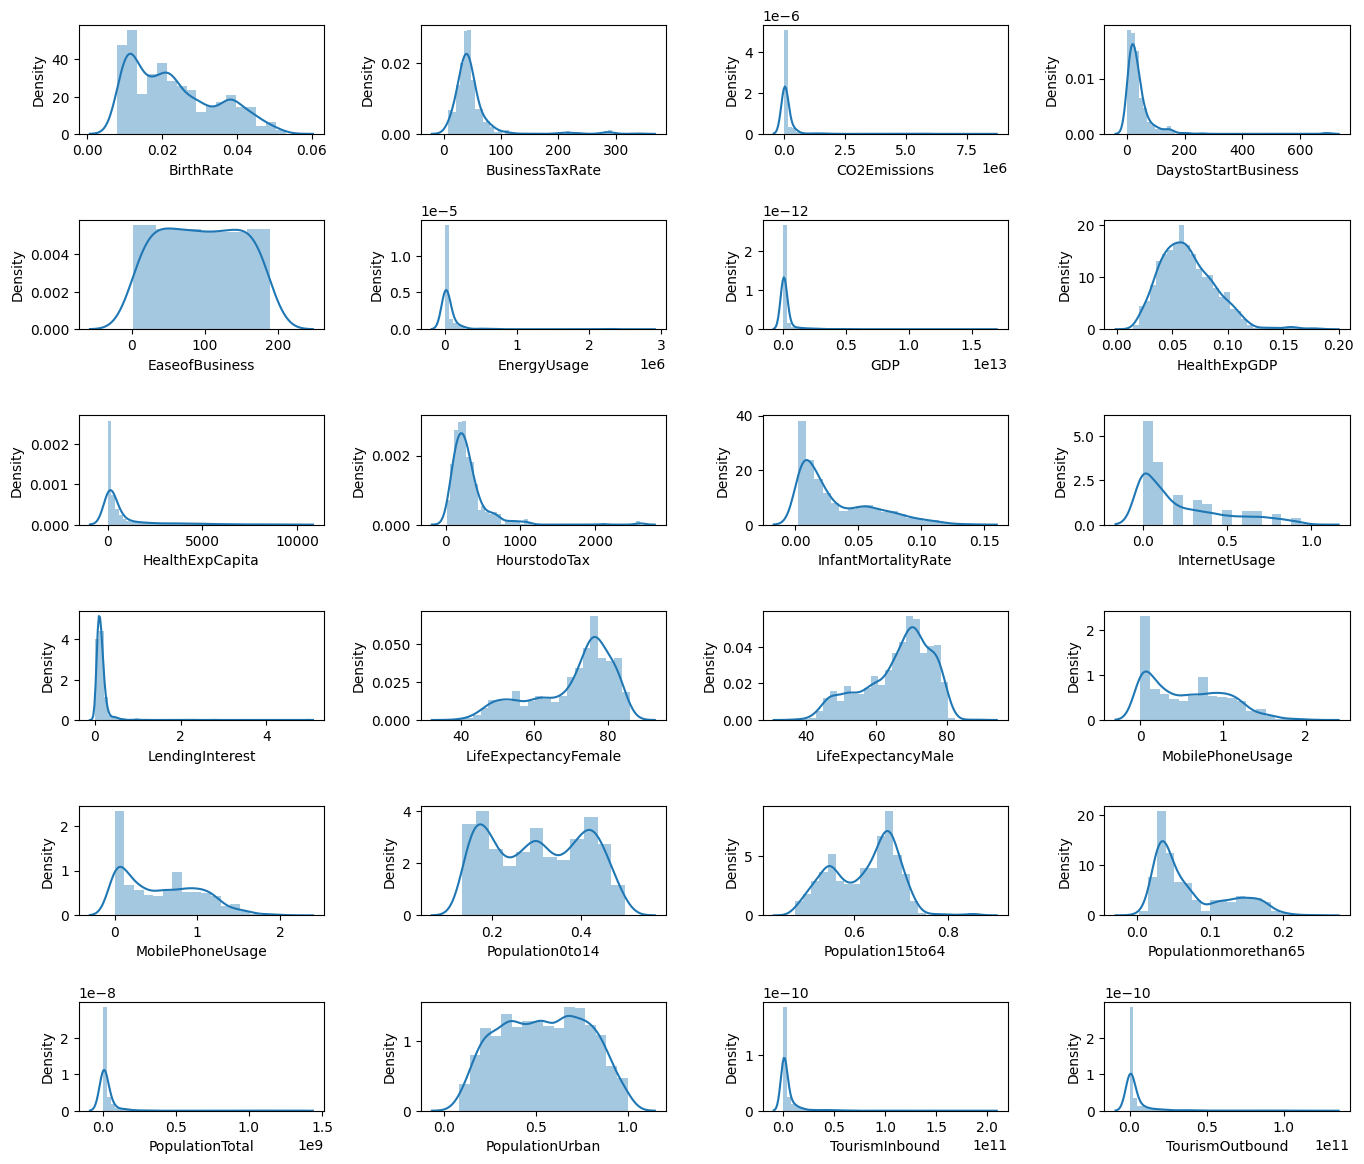

In [41]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emissions,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])
sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3])
sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data.Population0to14,ax=axes[4,1])
sns.distplot(data.Population15to64,ax=axes[4,2])
sns.distplot(data.Populationmorethan65,ax=axes[4,3])
sns.distplot(data.PopulationTotal,ax=axes[5,0])
sns.distplot(data.PopulationUrban,ax=axes[5,1])
sns.distplot(data.TourismInbound,ax=axes[5,2])
sns.distplot(data.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

In [42]:
columns_to_drop = ['HourstodoTax', 'EaseofBusiness']
data = data.drop(columns=columns_to_drop, axis=1)

In [43]:
data['BusinessTaxRate'] = data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['CO2Emissions'] = data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness'] = data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage'] = data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['HealthExpCapita']=data['HealthExpCapita'].fillna(data['HealthExpCapita'].mean())
data['LendingInterest'] = data['LendingInterest'].fillna(data['LendingInterest'].median())
data['TourismInbound'] = data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound'] = data['TourismOutbound'].fillna(data['TourismOutbound'].median())

In [44]:
data

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,MobilePhoneUsage,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded
0,0.020,48.883914,87931.0,27.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,48.883914,9542.0,27.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,3.0
2,0.043,48.883914,1617.0,27.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,17.0
3,0.027,48.883914,4276.0,27.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,21.0
4,0.046,48.883914,1041.0,27.0,14803.0,2.610959e+09,0.051,12.0,0.096,0.0,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.900000,11424.5,694.0,14803.0,5.012121e+09,0.059,521.0,0.021,0.3,...,1.1,1.0,0.278,0.656,0.066,534541.0,0.662,7.900000e+07,5.800000e+07,150.0
2698,0.015,29.100000,11424.5,41.0,14803.0,2.343634e+10,0.054,972.0,0.020,0.6,...,1.4,1.0,0.207,0.705,0.088,1337439.0,0.088,7.860000e+08,5.160000e+08,161.0
2700,0.013,46.400000,11424.5,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,...,1.0,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,169.0
2701,0.015,41.900000,11424.5,7.0,14803.0,5.000435e+10,0.089,1308.0,0.010,0.5,...,1.5,1.0,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,170.0


In [45]:
data.isnull().sum()

BirthRate                0
BusinessTaxRate          0
CO2Emissions             0
DaystoStartBusiness      0
EnergyUsage              0
GDP                      0
HealthExpGDP            13
HealthExpCapita          0
InfantMortalityRate      0
InternetUsage            0
LendingInterest          0
LifeExpectancyFemale     0
LifeExpectancyMale       0
MobilePhoneUsage         0
NumberofRecords          0
Population0to14          0
Population15to64         0
Populationmorethan65     0
PopulationTotal          0
PopulationUrban          0
TourismInbound           0
TourismOutbound          0
Country_encoded          0
dtype: int64

In [46]:
## Remove rows having null values
data.dropna(subset=['HealthExpGDP'],inplace=True)


In [47]:
data.shape

(2215, 23)

In [48]:
## check missising values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

0 missing values present in whole data.


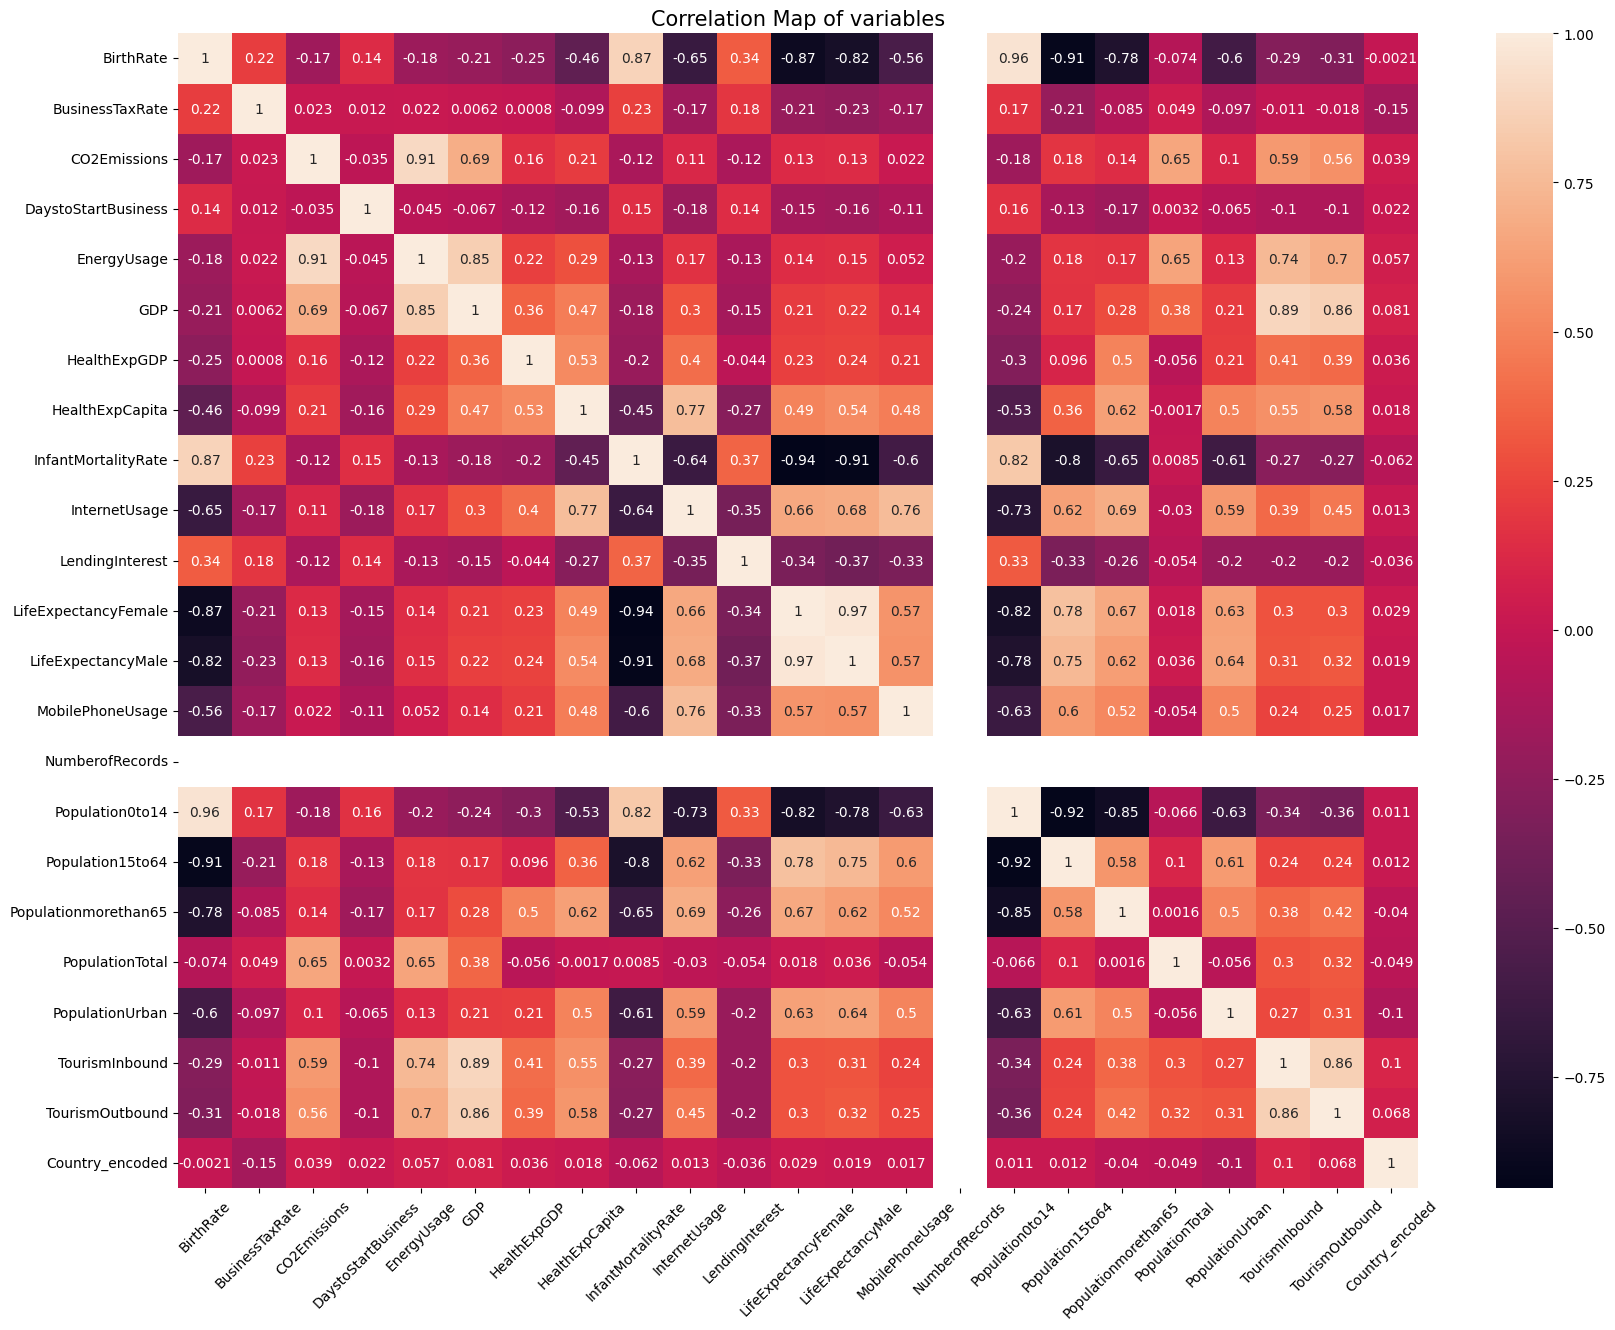

In [49]:
## visualise relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

Conclusion

'Population 0 to 14' and 'Birth Rate' has strong relation.

'Population 15 to 24' and 'Birth Rate' has weak relation.

In [50]:
## making copy of data
data1 = data.copy()    # For method 1
data2 = data.copy()    # For method 2
data3 = data.copy()    # For method 3

**Outlier Detection**


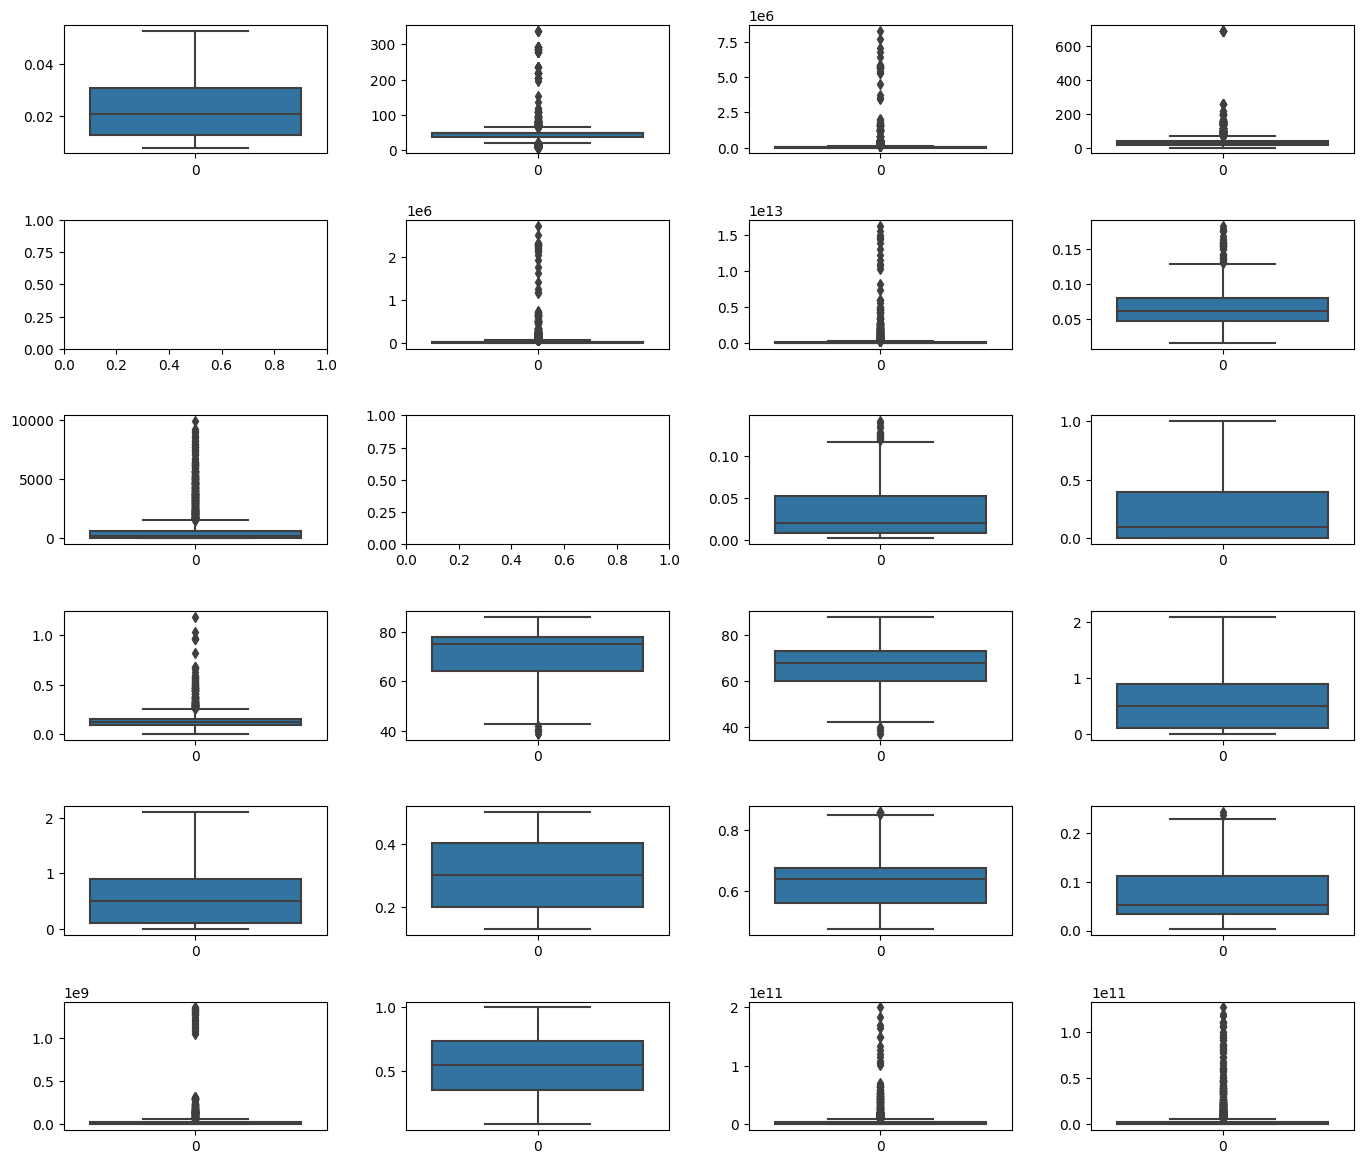

In [51]:
## Check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data1.BirthRate,ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data1.CO2Emissions,ax=axes[0,2])
sns.boxplot(data1.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(data1.GDP,ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,ax=axes[1,3])
sns.boxplot(data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data1.InternetUsage,ax=axes[2,3])
sns.boxplot(data1.LendingInterest,ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(data1.Population0to14,ax=axes[4,1])
sns.boxplot(data1.Population15to64,ax=axes[4,2])
sns.boxplot(data1.Populationmorethan65,ax=axes[4,3])
sns.boxplot(data1.PopulationTotal,ax=axes[5,0])
sns.boxplot(data1.PopulationUrban,ax=axes[5,1])
sns.boxplot(data1.TourismInbound,ax=axes[5,2])
sns.boxplot(data1.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

**Remove Outliers**

here, we are removing outliers using inter quratile range method

In [52]:
## Outlier removal
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
data1.shape

(1110, 23)

**Scaling**

  Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.

**There are two types of scaling**

Standard Scaling

MinMax Scaling

**Here we will be using Standard Scaler**


In [54]:
## Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

In [55]:
scale_data

array([[-0.42640206,  0.53234331,  3.01147872, ..., -0.62233095,
        -0.48135673, -1.66492752],
       [ 1.59514756,  0.53234331, -0.60945894, ..., -0.63912213,
        -0.65506919, -1.36870556],
       [ 0.18885217,  0.53234331, -0.49791188, ..., -0.53837508,
        -0.46192038, -1.28971304],
       ...,
       [-0.69008245, -0.71532784, -0.19802689, ..., -0.62837578,
        -0.69880099,  1.21829953],
       [-0.86586937, -1.89146141, -0.19802689, ..., -0.16292443,
        -0.08898525,  1.47502523],
       [-0.86586937, -0.32328332, -0.19802689, ...,  0.80156061,
         0.53297821,  1.6527584 ]])

**Apply PCA**

In [56]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [57]:
# The amount of variance that each PCA explains is
pc.explained_variance_

array([9.11704293e+00, 2.83765658e+00, 1.47213983e+00, 1.21136037e+00,
       1.10007741e+00, 9.45263419e-01, 9.26775463e-01, 8.39470376e-01,
       7.40862057e-01, 5.83869249e-01, 4.76301401e-01, 4.31343180e-01,
       2.85506677e-01, 2.27207271e-01, 2.16076469e-01, 1.91129734e-01,
       1.66535599e-01, 1.33263533e-01, 6.07357555e-02, 4.00452843e-02,
       1.71598595e-02, 1.52392113e-05, 1.64290857e-35])

In [58]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([4.14037699e-01, 1.28868188e-01, 6.68551627e-02, 5.50122298e-02,
       4.99584704e-02, 4.29278105e-02, 4.20882059e-02, 3.81233680e-02,
       3.36452097e-02, 2.65156018e-02, 2.16305591e-02, 1.95888447e-02,
       1.29658847e-02, 1.03182991e-02, 9.81280936e-03, 8.67988843e-03,
       7.56298029e-03, 6.05197616e-03, 2.75822903e-03, 1.81860034e-03,
       7.79290918e-04, 6.92067376e-07, 7.46103850e-37])

In [59]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 41.4 ,  54.29,  60.98,  66.48,  71.48,  75.77,  79.98,  83.79,
        87.15,  89.8 ,  91.96,  93.92,  95.22,  96.25,  97.23,  98.1 ,
        98.86,  99.47,  99.75,  99.93, 100.01, 100.01, 100.01])

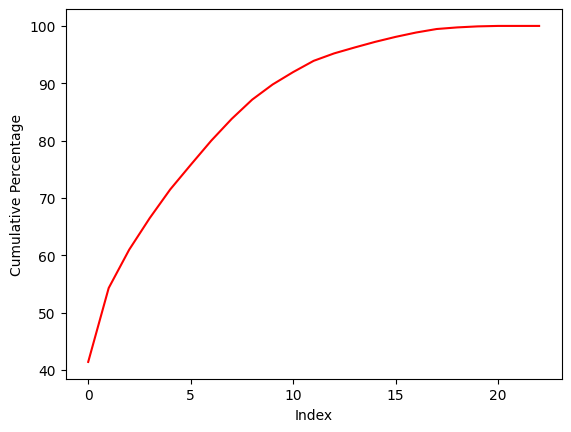

In [60]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 95% data.

In [61]:
data_pca = pc_components[:,:15]


In [62]:
data_pca.shape

(1110, 15)

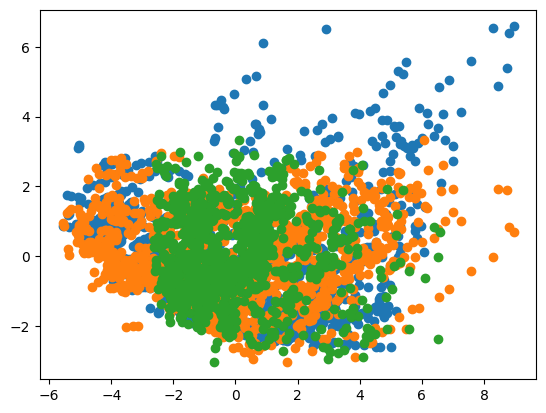

In [63]:
## Plot between PCA's
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()


# Method 1

**Model Building**


**There are various types of clustring mostly used are :**

-k-means clustring

-Hierarchy clustring

-DBSCAN clustring

# K-means Clustring

Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

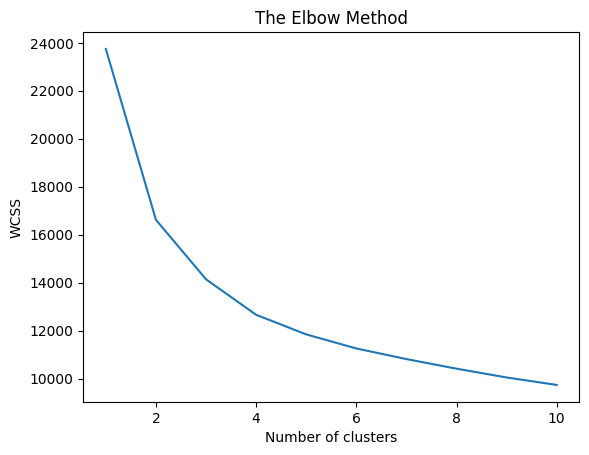

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



We can see that--

3 is the elbow point.

We have to create three clusters

In [65]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


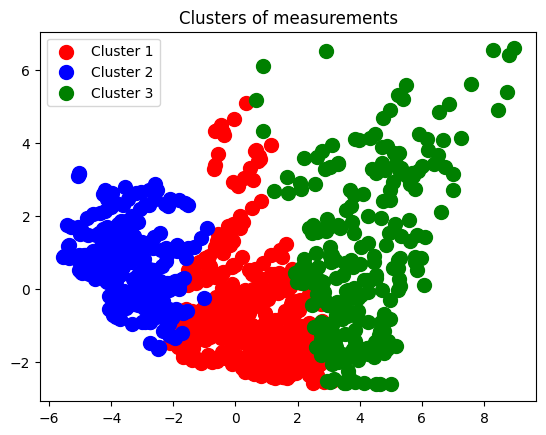

In [66]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [67]:
## Accuracy check
from sklearn.metrics import silhouette_score
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('Silhouette Score for K-means clustring :', s1_kmeans)

Silhouette Score for K-means clustring : 0.2068439495862105


# Hierarchy Clustring


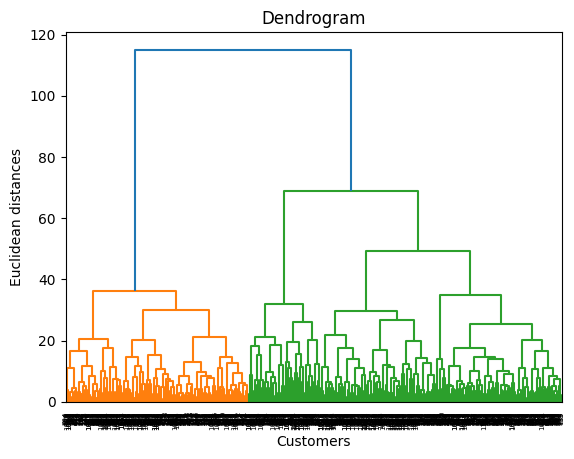

In [68]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


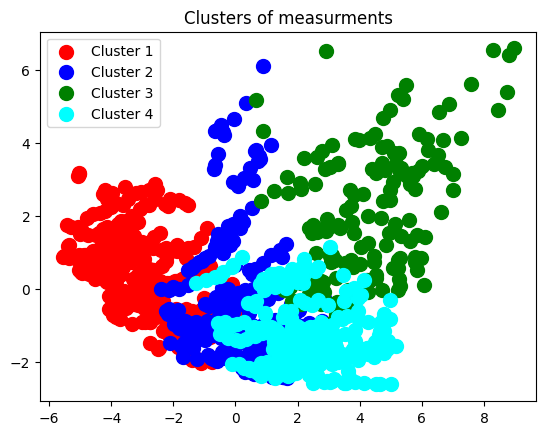

In [70]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [71]:
## Accuracy check
s1_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s1_hierarchy)

Silhouette Score for Hierarchy clustring : 0.15188652394913307


# DBSCAN

In [72]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

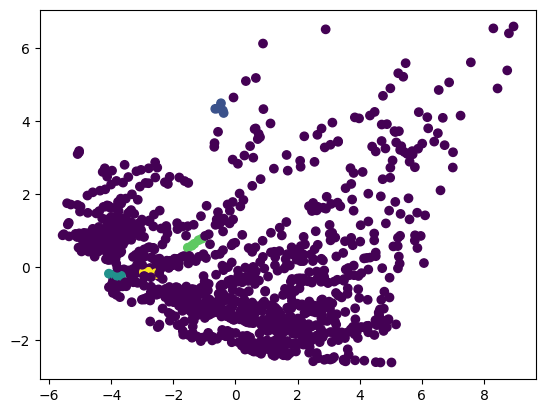

In [73]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [74]:
data1['cluster']=dbscan.labels_
data1.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,48.883914,87931.0,27.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,-1
2,0.043,48.883914,1617.0,27.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,...,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,17.0,1
3,0.027,48.883914,4276.0,27.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,21.0,-1
4,0.046,48.883914,1041.0,27.0,14803.0,2.610959e+09,0.051,12.0,0.096,0.0,...,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,25.0,-1
5,0.042,48.883914,301.0,27.0,14803.0,8.704861e+08,0.063,7.0,0.092,0.0,...,1.0,0.490,0.481,0.029,6674286.0,0.082,1400000.0,14000000.0,26.0,-1


In [75]:
# Use pandas filtering and get noisy datapoints -1
data1[data1['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,48.883914,87931.0,27.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0,-1
3,0.027,48.883914,4276.0,27.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,21.0,-1
4,0.046,48.883914,1041.0,27.0,14803.0,2.610959e+09,0.051,12.0,0.096,0.0,...,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,25.0,-1
5,0.042,48.883914,301.0,27.0,14803.0,8.704861e+08,0.063,7.0,0.092,0.0,...,1.0,0.490,0.481,0.029,6674286.0,0.082,1.400000e+06,1.400000e+07,26.0,-1
6,0.041,48.883914,3432.0,27.0,6310.0,9.287368e+09,0.044,26.0,0.093,0.0,...,1.0,0.453,0.513,0.034,15927713.0,0.455,1.320000e+08,2.410000e+08,28.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,0.020,36.400000,11424.5,25.0,14803.0,1.926361e+11,0.051,337.0,0.014,0.4,...,1.0,0.292,0.646,0.063,29987800.0,0.776,3.288000e+09,1.950000e+09,125.0,-1
2694,0.016,34.600000,11424.5,15.0,14803.0,1.318148e+09,0.085,556.0,0.013,0.3,...,1.0,0.243,0.670,0.087,180870.0,0.185,3.350000e+08,4.900000e+07,147.0,-1
2696,0.017,38.700000,11424.5,10.0,14803.0,6.944444e+08,0.052,340.0,0.018,0.5,...,1.0,0.257,0.675,0.068,109373.0,0.495,9.300000e+07,1.400000e+07,148.0,-1
2698,0.015,29.100000,11424.5,41.0,14803.0,2.343634e+10,0.054,972.0,0.020,0.6,...,1.0,0.207,0.705,0.088,1337439.0,0.088,7.860000e+08,5.160000e+08,161.0,-1


In [76]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s1_dbscan)

Silhouette Score for DBSCAN is: -0.2154926289878144


DBSCAN is not most effective on this dataset

We get clustrers but, we used outlier removal data. Problem with that data is we have only 40% data left after removing outliers. Which means we loss more than 50% information from out dataset. So, we have to keep outliers. Now, create clusters with this data.



# Method 2

With ouliers



In [77]:
## Standardization of data
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)

Apply PCA


In [78]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [79]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([4.08798976e-01, 1.75752609e-01, 7.34546157e-02, 5.48013067e-02,
       4.61055197e-02, 4.04203450e-02, 3.54405472e-02, 3.09717276e-02,
       2.90002843e-02, 2.20659491e-02, 1.91071207e-02, 1.76298658e-02,
       1.27612248e-02, 1.04707089e-02, 6.40998592e-03, 5.00826532e-03,
       4.48526371e-03, 3.19187691e-03, 1.77963774e-03, 1.65310485e-03,
       6.90410547e-04, 6.54909544e-07, 2.01795974e-35])

In [80]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 40.88,  58.46,  65.81,  71.29,  75.9 ,  79.94,  83.48,  86.58,
        89.48,  91.69,  93.6 ,  95.36,  96.64,  97.69,  98.33,  98.83,
        99.28,  99.6 ,  99.78,  99.95, 100.02, 100.02, 100.02])

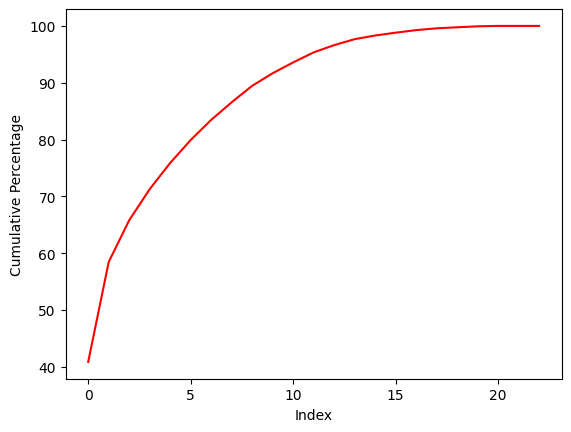

In [81]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers. here, we are taking 15 columns because they are giving more than 95% data.

In [82]:
data_pca2 = pc_components[:,:15]


# K-means Clustring
Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

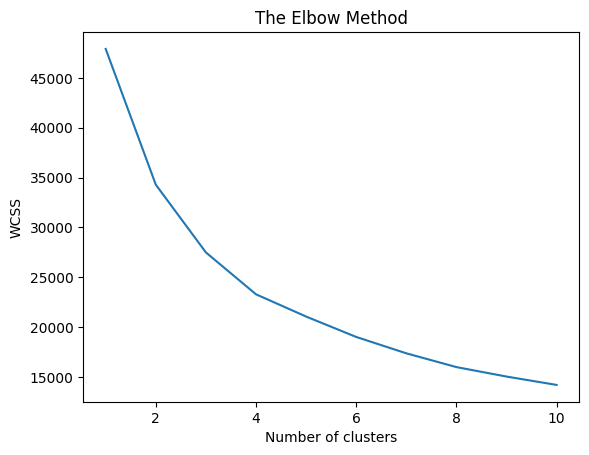

In [83]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see,

3 is the elbow point.

We have to create three clusters

In [84]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


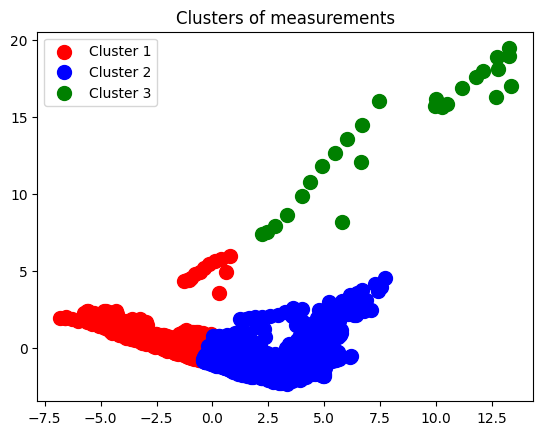

In [85]:
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [86]:
## Accuracy Check
s2_kmeans = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.30885408148099897


# Hierarchy Clustring


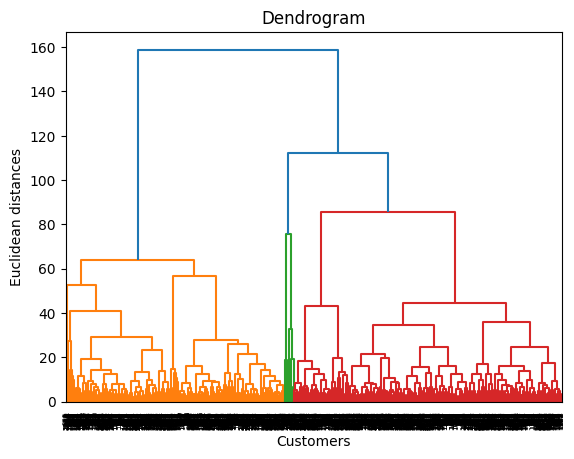

In [87]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [88]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


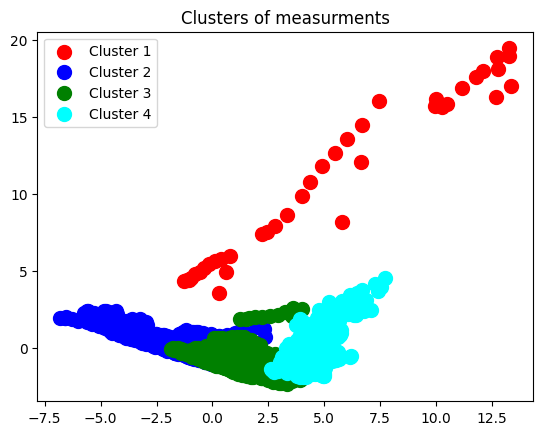

In [89]:
plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca2[y_hc == 3, 0], data_pca2[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [90]:
## Accuracy check
s2_hierarchy = silhouette_score(data_pca2,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.2374873155948632


# DBSCAN


In [91]:
dbscan = DBSCAN(eps=0.5,min_samples=5) # tried eps=0.2,0.3,0.4 here.....
dbscan_labels = dbscan.fit_predict(data_pca2)

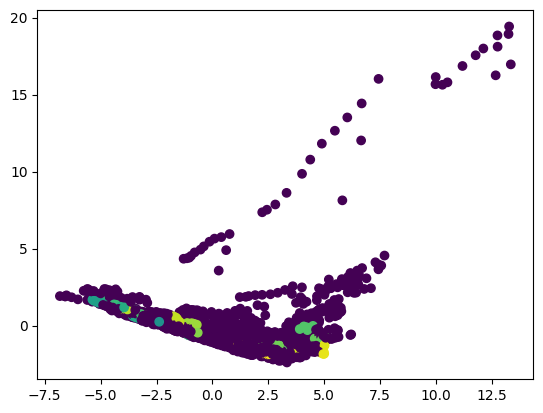

In [92]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [93]:
data2['cluster']=dbscan.labels_

In [94]:
data2[data2['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
1,0.050,48.883914,9542.0,27.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,...,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,3.0,-1
3,0.027,48.883914,4276.0,27.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,21.0,-1
5,0.042,48.883914,301.0,27.0,14803.0,8.704861e+08,0.063,7.0,0.092,0.0,...,1.0,0.490,0.481,0.029,6674286.0,0.082,1.400000e+06,1.400000e+07,26.0,-1
8,0.051,48.883914,176.0,27.0,14803.0,1.385058e+09,0.063,10.0,0.106,0.0,...,1.0,0.490,0.482,0.028,8301151.0,0.216,1.400000e+07,5.600000e+07,31.0,-1
10,0.048,48.883914,1646.0,27.0,16679.0,1.908805e+10,0.048,14.0,0.115,0.0,...,1.0,0.464,0.507,0.028,46949244.0,0.351,7.860000e+08,5.160000e+08,36.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.900000,11424.5,694.0,14803.0,5.012121e+09,0.059,521.0,0.021,0.3,...,1.0,0.278,0.656,0.066,534541.0,0.662,7.900000e+07,5.800000e+07,150.0,-1
2698,0.015,29.100000,11424.5,41.0,14803.0,2.343634e+10,0.054,972.0,0.020,0.6,...,1.0,0.207,0.705,0.088,1337439.0,0.088,7.860000e+08,5.160000e+08,161.0,-1
2700,0.013,46.400000,11424.5,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,169.0,-1
2701,0.015,41.900000,11424.5,7.0,14803.0,5.000435e+10,0.089,1308.0,0.010,0.5,...,1.0,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,170.0,-1


In [95]:
s2_dbscan = silhouette_score(data_pca2 , dbscan_labels)
print("Silhouette Score for DBSCAN is:", s2_dbscan)

Silhouette Score for DBSCAN is: -0.4099289994704891


# Method 3
**T-SNE**


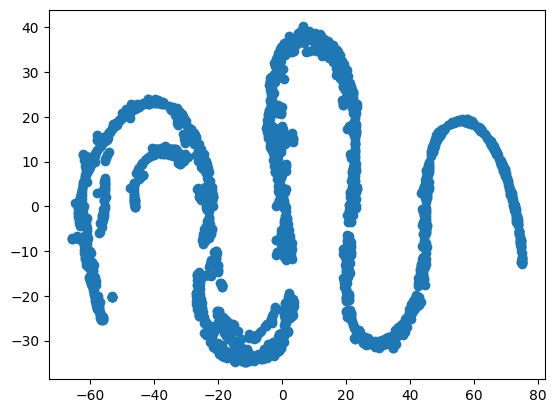

In [96]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data3)

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

# K-means Clustring


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

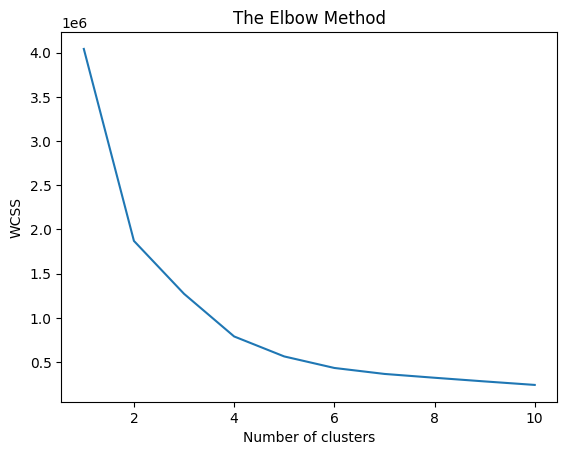

In [97]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_tsne)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
# Perform clustering with KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


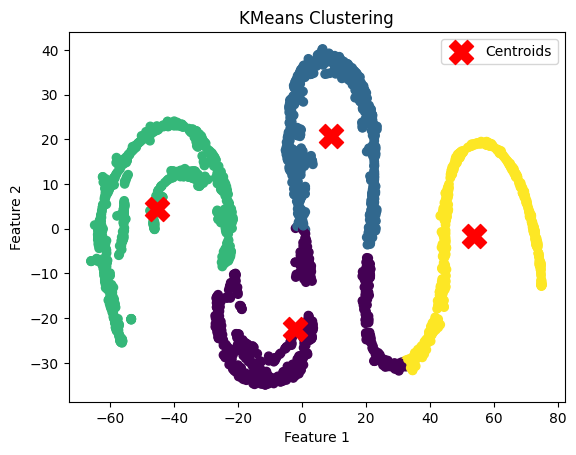

In [99]:
# Plot the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [100]:
## Accuracy check
s3_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s3_kmeans)

Silhouette Score for K-means clustring : 0.47918665


# Hierarchy Clustring


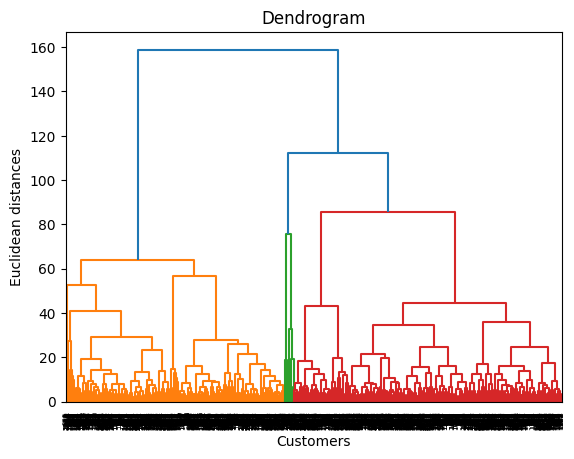

In [101]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [102]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


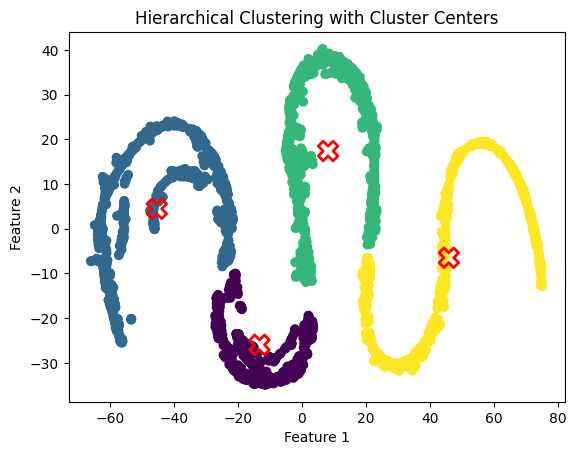

In [103]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# Perform hierarchical clustering
linked = linkage(data_tsne, 'ward')

# Determine the number of clusters based on a distance threshold or a specific number of clusters
num_clusters = 4
labels = fcluster(linked, num_clusters, criterion='maxclust')

# Plot the data points
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis')

# Calculate and plot the cluster representatives (centers)
for cluster_label in range(1, num_clusters + 1):
    cluster_points = data_tsne[labels == cluster_label]
    cluster_center = cluster_points.mean(axis=0)
    plt.scatter(cluster_center[0], cluster_center[1], s=200, marker='X', edgecolors='red', facecolors='none', linewidths=2)

plt.title('Hierarchical Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

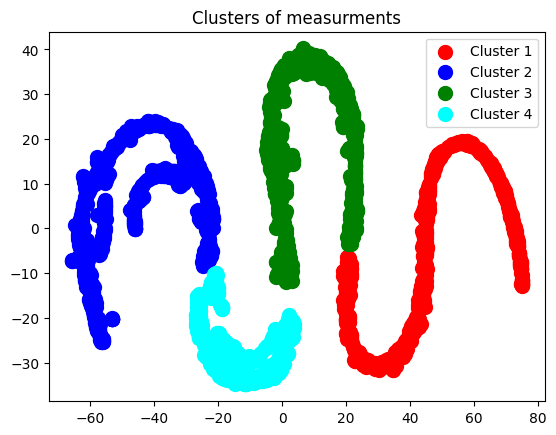

In [104]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [105]:
## Accuracy check
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.45493138


In [106]:
df = pd.DataFrame({'Method':['M1 kmeans','M1 hierarchy','M1 DBSCAN','M2 kmeans','M2 hierarchy','M2 DBSCAN','M3 kmeans','M3 hierarchy'],
                   'Silhouette Score':[s1_kmeans,s1_hierarchy,s1_dbscan,s2_kmeans,s2_hierarchy,s2_dbscan,s3_kmeans,s3_hierarchy]})
df

,Method,Silhouette Score
0,M1 kmeans,0.206844
1,M1 hierarchy,0.151887
2,M1 DBSCAN,-0.215493
3,M2 kmeans,0.308854
4,M2 hierarchy,0.237487
5,M2 DBSCAN,-0.409929
6,M3 kmeans,0.479187
7,M3 hierarchy,0.454931


In [107]:
# Performing clustering with KMeans because it is giving decent result..
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
data3['cluster_value'] = kmeans.fit_predict(data_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
data3

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster_value
0,0.020,48.883914,87931.0,27.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0,1
1,0.050,48.883914,9542.0,27.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,...,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,3.0,0
2,0.043,48.883914,1617.0,27.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,...,1.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,17.0,2
3,0.027,48.883914,4276.0,27.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,21.0,2
4,0.046,48.883914,1041.0,27.0,14803.0,2.610959e+09,0.051,12.0,0.096,0.0,...,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,25.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.900000,11424.5,694.0,14803.0,5.012121e+09,0.059,521.0,0.021,0.3,...,1.0,0.278,0.656,0.066,534541.0,0.662,7.900000e+07,5.800000e+07,150.0,2
2698,0.015,29.100000,11424.5,41.0,14803.0,2.343634e+10,0.054,972.0,0.020,0.6,...,1.0,0.207,0.705,0.088,1337439.0,0.088,7.860000e+08,5.160000e+08,161.0,1
2700,0.013,46.400000,11424.5,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,169.0,3
2701,0.015,41.900000,11424.5,7.0,14803.0,5.000435e+10,0.089,1308.0,0.010,0.5,...,1.0,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,170.0,1


In [109]:
data3.shape

(2215, 24)

In [110]:
data3_sorted = data3.sort_values(by='cluster_value')
data3_sorted

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster_value
1890,0.033,44.700000,81.0,57.0,1925.0,1.203127e+10,0.037,291.0,0.045,0.1,...,1.0,0.388,0.559,0.054,1519155.0,0.853,7.860000e+08,5.160000e+08,57.0,0
1717,0.041,36.300000,3927.0,9.0,14803.0,1.019053e+10,0.097,35.0,0.079,0.0,...,1.0,0.492,0.487,0.021,27032197.0,0.239,4.300000e+07,5.800000e+07,0.0,0
1715,0.043,15.000000,1845.0,18.0,7641.0,1.464079e+10,0.066,78.0,0.067,0.1,...,1.0,0.470,0.504,0.027,12456527.0,0.379,1.480000e+08,1.070000e+08,176.0,0
1714,0.046,34.000000,3161.0,25.0,14803.0,1.423903e+10,0.088,39.0,0.057,0.1,...,1.0,0.491,0.484,0.025,31778799.0,0.139,5.360000e+08,3.150000e+08,165.0,0
1703,0.039,45.500000,5442.0,9.0,3036.0,1.338635e+10,0.049,54.0,0.051,0.1,...,1.0,0.438,0.531,0.031,12238791.0,0.417,6.370000e+08,2.760000e+08,136.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.018,34.200000,203882.0,18.0,69858.0,2.022514e+11,0.039,285.0,0.007,0.6,...,1.0,0.282,0.671,0.047,27790324.0,0.701,1.723100e+10,7.196000e+09,99.0,3
518,0.009,48.883914,828771.0,27.0,338553.0,2.006588e+12,0.107,2610.0,0.004,0.5,...,1.0,0.151,0.676,0.173,82488495.0,0.732,2.669000e+10,5.949600e+10,60.0,3
517,0.013,48.883914,380840.0,27.0,261182.0,1.452031e+12,0.106,2497.0,0.004,0.3,...,1.0,0.187,0.651,0.162,61803229.0,0.764,4.053700e+10,2.780800e+10,56.0,3
1954,0.011,36.900000,276587.0,32.0,107300.0,2.637112e+11,0.041,164.0,0.013,0.2,...,1.0,0.199,0.715,0.086,66277335.0,0.427,1.981400e+10,5.749000e+09,157.0,3


In [111]:
# Separate the data for each cluster
clusters = data3_sorted['cluster_value'].unique()
clusters

array([0, 1, 2, 3], dtype=int32)

In [112]:
cluster0 = data3_sorted[data3_sorted['cluster_value'] == 0 ]

In [113]:
cluster0.shape

(579, 24)

In [114]:
cluster0

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster_value
1890,0.033,44.700000,81.0,57.0,1925.0,1.203127e+10,0.037,291.0,0.045,0.1,...,1.0,0.388,0.559,0.054,1519155.0,0.853,7.860000e+08,5.160000e+08,57.0,0
1717,0.041,36.300000,3927.0,9.0,14803.0,1.019053e+10,0.097,35.0,0.079,0.0,...,1.0,0.492,0.487,0.021,27032197.0,0.239,4.300000e+07,5.800000e+07,0.0,0
1715,0.043,15.000000,1845.0,18.0,7641.0,1.464079e+10,0.066,78.0,0.067,0.1,...,1.0,0.470,0.504,0.027,12456527.0,0.379,1.480000e+08,1.070000e+08,176.0,0
1714,0.046,34.000000,3161.0,25.0,14803.0,1.423903e+10,0.088,39.0,0.057,0.1,...,1.0,0.491,0.484,0.025,31778799.0,0.139,5.360000e+08,3.150000e+08,165.0,0
1703,0.039,45.500000,5442.0,9.0,3036.0,1.338635e+10,0.049,54.0,0.051,0.1,...,1.0,0.438,0.531,0.031,12238791.0,0.417,6.370000e+08,2.760000e+08,136.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,0.020,48.883914,5761.0,27.0,2889.0,1.640360e+10,0.071,291.0,0.011,0.1,...,1.0,0.308,0.637,0.055,4013488.0,0.604,1.339000e+09,4.340000e+08,38.0,0
2066,0.021,37.200000,47356.0,41.0,17200.0,1.212035e+11,0.053,234.0,0.016,0.3,...,1.0,0.304,0.637,0.059,28934303.0,0.766,2.440000e+09,1.404000e+09,125.0,0
2134,0.014,38.600000,4221.0,14.0,2483.0,9.260287e+09,0.046,143.0,0.016,0.3,...,1.0,0.205,0.689,0.105,2963496.0,0.636,4.560000e+08,4.660000e+08,6.0,0
2139,0.026,21.400000,4180.0,102.0,5024.0,1.124227e+10,0.058,46.0,0.037,0.0,...,1.0,0.318,0.631,0.050,14364931.0,0.198,1.332000e+09,2.680000e+08,27.0,0


In [115]:
cluster1 = data3_sorted[data3_sorted['cluster_value'] == 1 ]
cluster1.shape

(516, 24)

In [116]:
cluster1

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster_value
1921,0.018,62.300000,24807.0,11.0,9193.0,4.345494e+10,0.062,259.0,0.016,0.3,...,1.0,0.238,0.693,0.069,10439600.0,0.658,3.526000e+09,4.780000e+08,162.0,1
1389,0.014,35.400000,14499.0,46.0,4774.0,2.179635e+10,0.081,443.0,0.011,0.2,...,1.0,0.274,0.650,0.076,4079823.0,0.867,5.457000e+09,3.783000e+09,90.0,1
1956,0.022,48.883914,48525.0,27.0,19873.0,2.021439e+10,0.021,86.0,0.052,0.0,...,1.0,0.297,0.661,0.042,4978962.0,0.481,7.860000e+08,5.160000e+08,164.0,1
2135,0.018,40.900000,45731.0,8.0,11586.0,5.290270e+10,0.053,310.0,0.034,0.5,...,1.0,0.227,0.714,0.059,9054332.0,0.534,7.920000e+08,8.560000e+08,9.0,1
1957,0.023,94.800000,116607.0,15.0,44831.0,3.281683e+10,0.054,64.0,0.041,0.2,...,1.0,0.303,0.652,0.045,27767400.0,0.362,9.900000e+07,5.160000e+08,171.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.014,48.883914,34510.0,27.0,17120.0,5.330564e+10,0.077,1052.0,0.006,0.5,...,1.0,0.225,0.657,0.118,3880500.0,0.858,2.340000e+09,1.255000e+09,115.0,1
354,0.016,48.883914,101415.0,27.0,37365.0,1.033116e+11,0.025,815.0,0.009,0.3,...,1.0,0.249,0.741,0.010,3132104.0,0.807,1.200000e+09,3.321000e+09,167.0,1
717,0.009,48.883914,47308.0,32.0,19399.0,2.066818e+10,0.076,201.0,0.016,0.1,...,1.0,0.143,0.685,0.171,7823557.0,0.699,2.051000e+09,1.467000e+09,24.0,1
240,0.021,48.883914,37715.0,27.0,10894.0,3.772467e+10,0.044,58.0,0.041,0.0,...,1.0,0.333,0.619,0.048,29021156.0,0.537,2.966000e+09,5.890000e+08,110.0,1


In [117]:
cluster2 = data3_sorted[data3_sorted['cluster_value'] == 2 ]
cluster2.shape

(660, 24)

In [118]:
cluster2

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster_value
1900,0.041,26.300000,1060.0,39.0,14803.0,5.030640e+09,0.083,29.0,0.055,0.0,...,1.0,0.459,0.510,0.031,14573338.0,0.154,4.600000e+07,91000000.0,98.0,2
1902,0.036,85.800000,2211.0,19.0,14803.0,3.027033e+09,0.054,46.0,0.071,0.0,...,1.0,0.407,0.561,0.031,3516077.0,0.560,7.860000e+08,516000000.0,103.0,2
2486,0.016,34.400000,11424.5,15.0,14803.0,1.295926e+09,0.076,513.0,0.013,0.5,...,1.0,0.248,0.666,0.086,179271.0,0.185,3.210000e+08,48000000.0,147.0,2
2488,0.017,38.700000,11424.5,10.0,14803.0,6.770370e+08,0.049,310.0,0.018,0.4,...,1.0,0.261,0.671,0.068,109357.0,0.491,9.200000e+07,13000000.0,148.0,2
2489,0.018,27.900000,11424.5,694.0,14803.0,4.363219e+09,0.060,490.0,0.022,0.3,...,1.0,0.283,0.652,0.065,529761.0,0.663,6.900000e+07,49000000.0,150.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,0.022,26.800000,11424.5,9.0,14803.0,2.113179e+09,0.085,558.0,0.009,0.4,...,1.0,0.290,0.660,0.050,338442.0,0.423,1.873000e+09,270000000.0,100.0,2
1513,0.022,40.800000,392.0,48.0,244.0,1.196092e+09,0.050,88.0,0.041,0.1,...,1.0,0.320,0.638,0.042,679365.0,0.325,4.700000e+07,26000000.0,18.0,2
834,0.041,48.883914,2512.0,31.0,2491.0,4.050870e+09,0.046,23.0,0.078,0.0,...,1.0,0.447,0.525,0.028,7922796.0,0.396,1.210000e+08,59000000.0,17.0,2
1702,0.037,47.200000,84.0,144.0,14803.0,1.834650e+08,0.063,75.0,0.043,0.2,...,1.0,0.416,0.546,0.038,168253.0,0.604,7.700000e+06,300000.0,134.0,2


In [119]:
cluster3 = data3_sorted[data3_sorted['cluster_value'] == 3 ]
cluster3.shape

(460, 24)

In [120]:
cluster3

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster_value
132,0.021,48.883914,216148.0,27.0,76348.0,2.665675e+11,0.049,196.0,0.034,0.0,...,1.0,0.307,0.634,0.060,63174483.0,0.647,7.636000e+09,1.713000e+09,163.0,3
2496,0.025,71.900000,11424.5,25.0,14803.0,2.043310e+11,0.052,279.0,0.022,0.2,...,1.0,0.274,0.679,0.047,38481705.0,0.689,2.950000e+08,5.590000e+08,2.0,3
2667,0.015,68.500000,11424.5,119.0,14803.0,2.248781e+12,0.093,1056.0,0.013,0.5,...,1.0,0.246,0.681,0.073,198656019.0,0.849,6.890000e+09,2.620200e+10,22.0,3
134,0.012,48.883914,543662.0,27.0,222940.0,1.493628e+12,0.070,1761.0,0.006,0.3,...,1.0,0.190,0.652,0.158,58892514.0,0.787,2.997800e+10,4.700900e+10,168.0,3
2478,0.019,52.700000,11424.5,6.0,186171.0,1.170086e+12,0.060,609.0,0.014,0.4,...,1.0,0.295,0.643,0.061,119361233.0,0.781,1.245800e+10,9.704000e+09,105.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.018,34.200000,203882.0,18.0,69858.0,2.022514e+11,0.039,285.0,0.007,0.6,...,1.0,0.282,0.671,0.047,27790324.0,0.701,1.723100e+10,7.196000e+09,99.0,3
518,0.009,48.883914,828771.0,27.0,338553.0,2.006588e+12,0.107,2610.0,0.004,0.5,...,1.0,0.151,0.676,0.173,82488495.0,0.732,2.669000e+10,5.949600e+10,60.0,3
517,0.013,48.883914,380840.0,27.0,261182.0,1.452031e+12,0.106,2497.0,0.004,0.3,...,1.0,0.187,0.651,0.162,61803229.0,0.764,4.053700e+10,2.780800e+10,56.0,3
1954,0.011,36.900000,276587.0,32.0,107300.0,2.637112e+11,0.041,164.0,0.013,0.2,...,1.0,0.199,0.715,0.086,66277335.0,0.427,1.981400e+10,5.749000e+09,157.0,3


In [121]:
cluster3.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EnergyUsage', 'GDP', 'HealthExpGDP', 'HealthExpCapita',
       'InfantMortalityRate', 'InternetUsage', 'LendingInterest',
       'LifeExpectancyFemale', 'LifeExpectancyMale', 'MobilePhoneUsage',
       'NumberofRecords', 'Population0to14', 'Population15to64',
       'Populationmorethan65', 'PopulationTotal', 'PopulationUrban',
       'TourismInbound', 'TourismOutbound', 'Country_encoded',
       'cluster_value'],
      dtype='object')

In [122]:
data_frame = {'column_names': ['BirthRate','BusinessTaxRate','CO2Emissions','DaystoStartBusiness','EnergyUsage','GDP','HealthExpGDP','HealthExpCapita','InfantMortalityRate','InternetUsage','LendingInterest','LifeExpectancyFemale','LifeExpectancyMale','MobilePhoneUsage','NumberofRecords','Population0to14','Population15to64','Populationmorethan65','PopulationTotal','PopulationUrban','TourismInbound','TourismOutbound'],
         'cluster0': [cluster0['BirthRate'].mean(), cluster0['BusinessTaxRate'].mean(), cluster0['CO2Emissions'].mean(), cluster0['DaystoStartBusiness'].mean(),
                      cluster0['EnergyUsage'].mean(),cluster0['GDP'].mean(),cluster0['HealthExpGDP'].mean(),cluster0['HealthExpCapita'].mean(),
                      cluster0['InfantMortalityRate'].mean(),cluster0['InternetUsage'].mean(),cluster0['LendingInterest'].mean(),cluster0['LifeExpectancyFemale'].mean(),
                      cluster0['LifeExpectancyMale'].mean(),cluster0['MobilePhoneUsage'].mean(),cluster0['NumberofRecords'].mean(),cluster0['Population0to14'].mean(),
                      cluster0['Population15to64'].mean(),cluster0['Populationmorethan65'].mean(),cluster0['PopulationTotal'].mean(),cluster0['PopulationUrban'].mean(),
                      cluster0['TourismInbound'].mean(),cluster0['TourismOutbound'].mean()],
         'cluster1': [cluster1['BirthRate'].mean(), cluster1['BusinessTaxRate'].mean(), cluster1['CO2Emissions'].mean(), cluster1['DaystoStartBusiness'].mean(),
                      cluster1['EnergyUsage'].mean(),cluster1['GDP'].mean(),cluster1['HealthExpGDP'].mean(),cluster1['HealthExpCapita'].mean(),
                      cluster1['InfantMortalityRate'].mean(),cluster1['InternetUsage'].mean(),cluster1['LendingInterest'].mean(),cluster1['LifeExpectancyFemale'].mean(),
                      cluster1['LifeExpectancyMale'].mean(),cluster1['MobilePhoneUsage'].mean(),cluster1['NumberofRecords'].mean(),cluster1['Population0to14'].mean(),
                      cluster1['Population15to64'].mean(),cluster1['Populationmorethan65'].mean(),cluster1['PopulationTotal'].mean(),cluster1['PopulationUrban'].mean(),
                      cluster1['TourismInbound'].mean(),cluster1['TourismOutbound'].mean()],
         'cluster2': [cluster2['BirthRate'].mean(), cluster2['BusinessTaxRate'].mean(), cluster2['CO2Emissions'].mean(), cluster2['DaystoStartBusiness'].mean(),
                      cluster2['EnergyUsage'].mean(),cluster2['GDP'].mean(),cluster2['HealthExpGDP'].mean(),cluster2['HealthExpCapita'].mean(),
                      cluster2['InfantMortalityRate'].mean(),cluster2['InternetUsage'].mean(),cluster2['LendingInterest'].mean(),cluster2['LifeExpectancyFemale'].mean(),
                      cluster2['LifeExpectancyMale'].mean(),cluster2['MobilePhoneUsage'].mean(),cluster2['NumberofRecords'].mean(),cluster2['Population0to14'].mean(),
                      cluster2['Population15to64'].mean(),cluster2['Populationmorethan65'].mean(),cluster2['PopulationTotal'].mean(),cluster2['PopulationUrban'].mean(),
                      cluster2['TourismInbound'].mean(),cluster2['TourismOutbound'].mean()],
         'cluster3': [cluster3['BirthRate'].mean(), cluster3['BusinessTaxRate'].mean(), cluster3['CO2Emissions'].mean(), cluster3['DaystoStartBusiness'].mean(),
                      cluster3['EnergyUsage'].mean(),cluster3['GDP'].mean(),cluster3['HealthExpGDP'].mean(),cluster3['HealthExpCapita'].mean(),
                      cluster3['InfantMortalityRate'].mean(),cluster3['InternetUsage'].mean(),cluster3['LendingInterest'].mean(),cluster3['LifeExpectancyFemale'].mean(),
                      cluster3['LifeExpectancyMale'].mean(),cluster3['MobilePhoneUsage'].mean(),cluster3['NumberofRecords'].mean(),cluster3['Population0to14'].mean(),
                      cluster3['Population15to64'].mean(),cluster3['Populationmorethan65'].mean(),cluster3['PopulationTotal'].mean(),cluster3['PopulationUrban'].mean(),
                      cluster3['TourismInbound'].mean(),cluster3['TourismOutbound'].mean()]}
org_df = pd.DataFrame(data_frame)

In [123]:
org_df

,column_names,cluster0,cluster1,cluster2,cluster3
0,BirthRate,2.435406e-02,2.068605e-02,2.996364e-02,1.444348e-02
1,BusinessTaxRate,4.556281e+01,4.690165e+01,5.479018e+01,4.694523e+01
2,CO2Emissions,3.896072e+04,4.075237e+04,3.230918e+03,5.589454e+05
3,DaystoStartBusiness,3.726770e+01,3.125775e+01,4.726515e+01,2.716304e+01
4,EnergyUsage,1.996717e+04,1.918050e+04,9.446427e+03,2.535855e+05
5,GDP,4.602835e+10,4.565058e+10,2.496514e+09,1.303782e+12
6,HealthExpGDP,5.975648e-02,5.862984e-02,6.308485e-02,7.825217e-02
7,HealthExpCapita,4.897513e+02,5.590969e+02,1.375939e+02,2.355157e+03
8,InfantMortalityRate,3.401900e-02,2.512016e-02,5.034091e-02,1.190652e-02
9,InternetUsage,1.829016e-01,2.248062e-01,7.742424e-02,4.828261e-01


In [124]:
org_copy = org_df.copy()
org_copy= org_copy.drop(columns=['column_names'])


In [125]:
# Save the DataFrame to a CSV file
csv_filename = 'world_development_sort_data.csv'
org_copy.to_csv(csv_filename, index=False)

### DATA VISUALISATION
# Finding insights

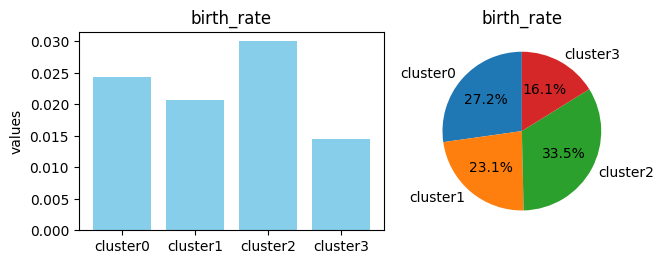

In [126]:
BirthRate = org_copy.iloc[0]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, BirthRate, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('birth_rate')

# Plot the pie chart on the second subplot
axes[1].pie(BirthRate, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('birth_rate')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()


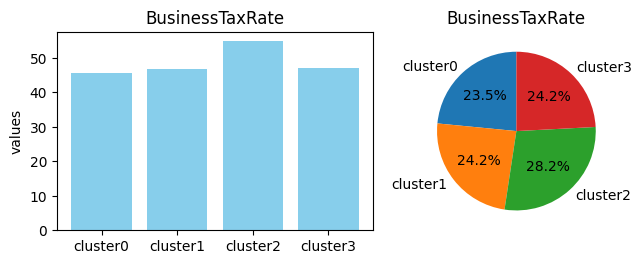

In [127]:
BusinessTaxRate = org_copy.iloc[1]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, BusinessTaxRate, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('BusinessTaxRate')

# Plot the pie chart on the second subplot
axes[1].pie(BusinessTaxRate, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('BusinessTaxRate')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()


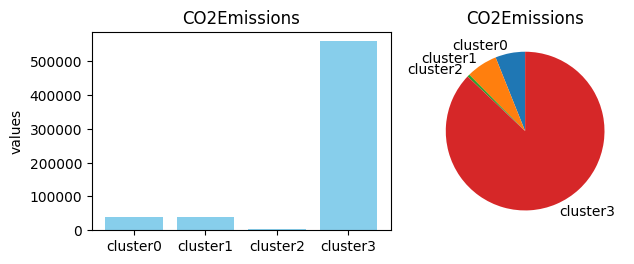

In [128]:
CO2Emissions = org_copy.iloc[2]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, CO2Emissions, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('CO2Emissions')

# Plot the pie chart on the second subplot
axes[1].pie(CO2Emissions, labels=org_copy.columns, startangle=90)
axes[1].set_title('CO2Emissions')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

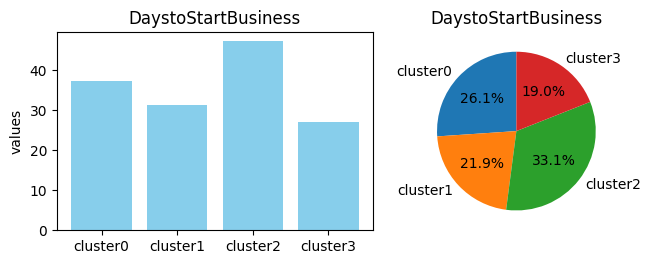

In [129]:
DaystoStartBusiness = org_copy.iloc[3]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, DaystoStartBusiness, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('DaystoStartBusiness')

# Plot the pie chart on the second subplot
axes[1].pie(DaystoStartBusiness, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('DaystoStartBusiness')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

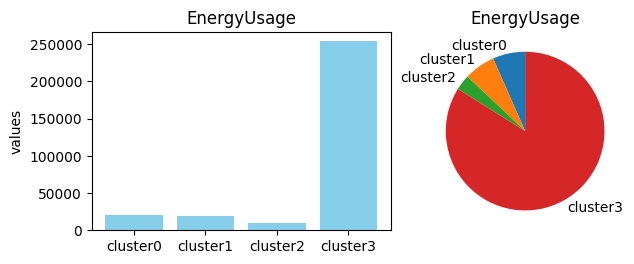

In [130]:
EnergyUsage = org_copy.iloc[4]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, EnergyUsage, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('EnergyUsage')

# Plot the pie chart on the second subplot
axes[1].pie(EnergyUsage, labels=org_copy.columns, startangle=90)
axes[1].set_title('EnergyUsage')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

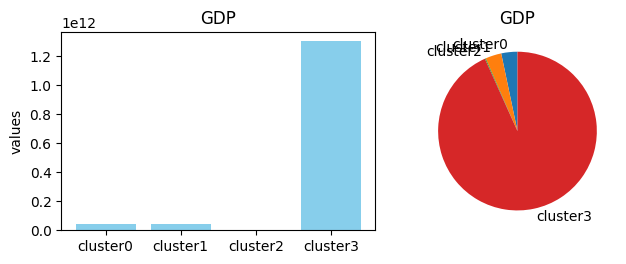

In [131]:
GDP = org_copy.iloc[5]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, GDP, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('GDP')

# Plot the pie chart on the second subplot
axes[1].pie(GDP, labels=org_copy.columns, startangle=90)
axes[1].set_title('GDP')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

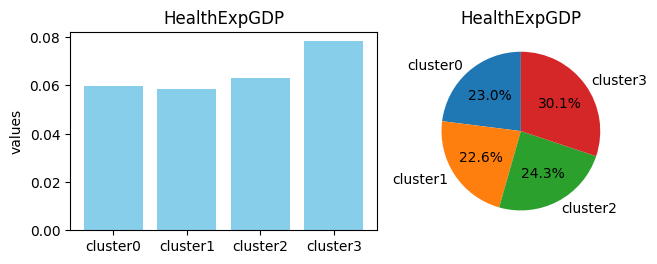

In [132]:
HealthExpGDP = org_copy.iloc[6]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, HealthExpGDP, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('HealthExpGDP')

# Plot the pie chart on the second subplot
axes[1].pie(HealthExpGDP, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('HealthExpGDP')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

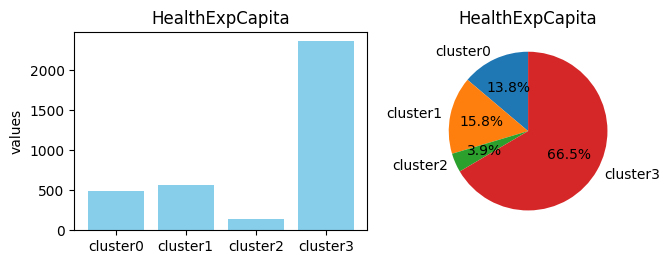

In [133]:
HealthExpCapita = org_copy.iloc[7]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, HealthExpCapita, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('HealthExpCapita')

# Plot the pie chart on the second subplot
axes[1].pie(HealthExpCapita, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('HealthExpCapita')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

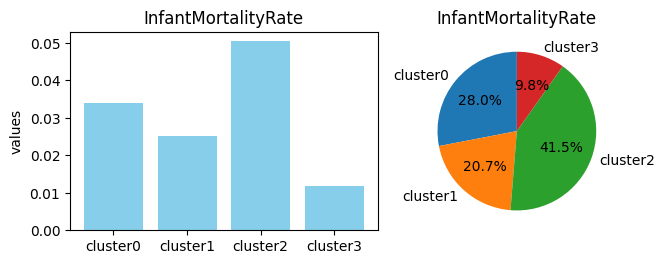

In [134]:
InfantMortalityRate	 = org_copy.iloc[8]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, InfantMortalityRate	, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('InfantMortalityRate')

# Plot the pie chart on the second subplot
axes[1].pie(InfantMortalityRate	, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('InfantMortalityRate')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

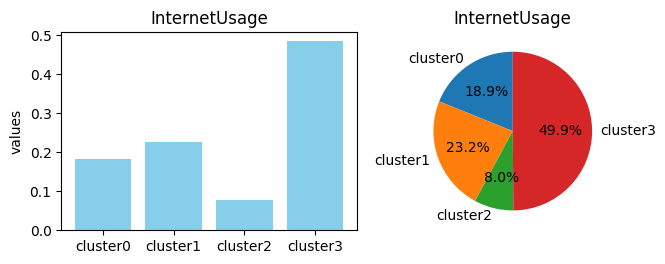

In [135]:
InternetUsage = org_copy.iloc[9]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, InternetUsage, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('InternetUsage')

# Plot the pie chart on the second subplot
axes[1].pie(InternetUsage, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('InternetUsage')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

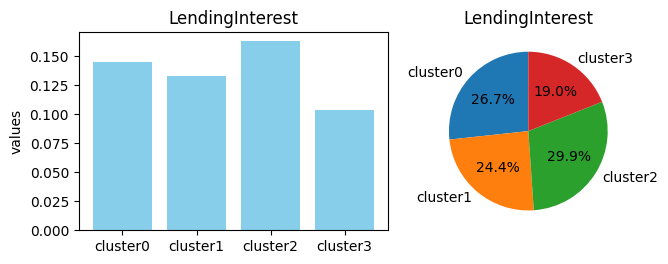

In [136]:
LendingInterest = org_copy.iloc[10]

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the bar chart on the first subplot
axes[0].bar(org_copy.columns, LendingInterest, color='skyblue')
axes[0].set_ylabel('values')
axes[0].set_title('LendingInterest')

# Plot the pie chart on the second subplot
axes[1].pie(LendingInterest, labels=org_copy.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('LendingInterest')

# Adjust layout for better spacing
plt.tight_layout(pad=2, h_pad=0.3, w_pad=0.3, rect=(0.1, 0.1, 0.7, 0.7))

# Show the plots
plt.show()

In [162]:
import pickle

In [163]:
data_to_pickle = [data, "cluster", {"boxplot": "visualization"}]  # Example data
with open("my_pickled_data.pkl", "wb") as f:  # Open a file in binary write mode
    pickle.dump(data_to_pickle, f)  # Serialize the data and write it to the file


In [164]:
with open("my_pickled_data.pkl", "rb") as f:  # Open the file in binary read mode
    unpickled_data = pickle.load(f)  # Load and deserialize the data
print(unpickled_data)  # Output: [1, 2, 3, 'hello', {'name': 'Alice'}]


[      BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0         0.020        48.883914       87931.0                 27.0   
1         0.050        48.883914        9542.0                 27.0   
2         0.043        48.883914        1617.0                 27.0   
3         0.027        48.883914        4276.0                 27.0   
4         0.046        48.883914        1041.0                 27.0   
...         ...              ...           ...                  ...   
2697      0.018        27.900000       11424.5                694.0   
2698      0.015        29.100000       11424.5                 41.0   
2700      0.013        46.400000       11424.5                  5.0   
2701      0.015        41.900000       11424.5                  7.0   
2702      0.020        61.900000       11424.5                144.0   

      EnergyUsage           GDP  HealthExpGDP  HealthExpCapita  \
0         26998.0  5.479006e+10         0.035             60.0   
1          749

In [165]:
with open('model_pickle','wb')as f:
  pickle.dump(data,f)

In [166]:
with open('model_pickle','rb')as f:
  mp = pickle.load(f)

In [171]:
mp=data

In [172]:
mp

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,InfantMortalityRate,InternetUsage,...,MobilePhoneUsage,NumberofRecords,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded
0,0.020,48.883914,87931.0,27.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0
1,0.050,48.883914,9542.0,27.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,3.0
2,0.043,48.883914,1617.0,27.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,17.0
3,0.027,48.883914,4276.0,27.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,21.0
4,0.046,48.883914,1041.0,27.0,14803.0,2.610959e+09,0.051,12.0,0.096,0.0,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,0.018,27.900000,11424.5,694.0,14803.0,5.012121e+09,0.059,521.0,0.021,0.3,...,1.1,1.0,0.278,0.656,0.066,534541.0,0.662,7.900000e+07,5.800000e+07,150.0
2698,0.015,29.100000,11424.5,41.0,14803.0,2.343634e+10,0.054,972.0,0.020,0.6,...,1.4,1.0,0.207,0.705,0.088,1337439.0,0.088,7.860000e+08,5.160000e+08,161.0
2700,0.013,46.400000,11424.5,5.0,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,...,1.0,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,169.0
2701,0.015,41.900000,11424.5,7.0,14803.0,5.000435e+10,0.089,1308.0,0.010,0.5,...,1.5,1.0,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,170.0


In [155]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [185]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_samples,silhouette_score
import plotly.express as px
import numpy as np

# Load the pickle file
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)
st.title("Global Development Measurement")
st.subheader("EDA")
st.write("mp data:", mp.dtypes)
st.write("mp shape:", mp.shape)
st.write("mp columns:", mp.columns)
st.write("Descriptive statistics:", mp.describe())
st.write("Correlation:",mp.corr())
import matplotlib.pyplot as plt
import seaborn as sns

#heatmap

st.subheader("Heatmap")
hm=sns.heatmap(mp.corr(),cmap="magma",annot=True)
st.pyplot(hm.figure)


tsne_result = TSNE(n_components=2).fit_transform(mp)

fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],color='red')
#plt.title('TSNE before Clustering',fontdict={'color':'red'})
fig.savefig('TSNE-2D.jpg')
plt.show()


kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(tsne_result)

# Calculate silhouette score
silhouette_avg = silhouette_score(tsne_result, clusters)

# Visualize with Streamlit
st.title("t-SNE Clustering Visualization")

# Scatter plot for t-SNE
st.subheader("t-SNE Plot")
tsne_df = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])
tsne_df['cluster'] = clusters
fig_tsne=plt.scatter(tsne_result[:,0],tsne_result[:,1])

#fig_tsne = sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=tsne_df)
st.pyplot(fig_tsne.figure)

st.write("tsne_result:",tsne_result)

# Cluster distribution
st.subheader("Cluster Distribution")
cluster_distribution = pd.Series(clusters).value_counts().sort_index()
st.bar_chart(cluster_distribution)

#Cluster Visualization
st.subheader("Cluster Visualization")
fig_c=sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=tsne_df)
st.pyplot(fig_c.figure)

# Silhouette score
st.subheader("Silhouette Score")
st.write(f"The average silhouette score is: {silhouette_avg:.4f}")



Overwriting app.py


In [186]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.495s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [187]:
!streamlit run app.py &>/content/logs.txt &

In [188]:
!npx localtunnel --port 8501  & curl ipv4.icanhazip.com

34.75.253.30
npx: installed 22 in 2.422s
your url is: https://happy-bikes-post.loca.lt
